<a href="https://colab.research.google.com/github/MarcoCarnaghi-fi/UNS_Aprendizaje_Maquina_2021/blob/main/TP-KNN/KNN_Carnaghi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KNN 

El objetivo del presente notebook es:
* generar dos conjuntos de datos con distinta media y covarianza
* entrenar un clasificador mediante KNN
* extraer conclusiones respecto a las variaciones en el dataset y parámetros del clasificador


In [ ]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
#Data generation
means_A = [30,80]
cov_A = [[10, 5],[5,15]]

means_B = [60,15]
cov_B = [[10, 1],[1,30]]

x_A, y_A = np.random.multivariate_normal(means_A, cov_A, 100).T
x_B, y_B = np.random.multivariate_normal(means_B, cov_B, 100).T

x_A

array([30.10457657, 28.99692893, 31.01683856, 29.7638393 , 30.20029085,
       27.81610368, 29.4987491 , 34.48761189, 26.35221864, 35.98942484,
       28.43580714, 36.53261362, 30.96266635, 28.08386354, 32.23891402,
       35.98388012, 32.20375886, 27.93397574, 33.53298372, 31.15358621,
       29.69876713, 26.10823474, 35.51779152, 29.79563018, 30.10821485,
       31.53363951, 27.42689931, 38.0620426 , 30.40351578, 32.94787233,
       28.72549958, 25.79543036, 29.92528764, 31.31245011, 29.08354776,
       29.0942193 , 34.10130273, 28.33109062, 30.07522677, 26.83029189,
       30.83451993, 27.79984271, 30.19523715, 25.72892943, 29.15060259,
       24.89675508, 27.5633994 , 26.34229039, 32.7197903 , 31.09201736,
       32.17984627, 30.97355027, 28.24765323, 26.60346376, 31.42427267,
       23.36336718, 26.57262405, 26.92081954, 24.73772177, 38.62298426,
       30.31619118, 30.77323966, 29.55365815, 32.30406245, 30.79706778,
       28.14234166, 32.26853299, 25.38654901, 30.30407789, 27.81

In [ ]:
XA = np.ndarray.tolist(x_A)
YA = np.ndarray.tolist(y_A)
XB = np.ndarray.tolist(x_B)
YB = np.ndarray.tolist(y_B)

XA.extend(XB)
YA.extend(YB)

In [ ]:
#DataFrame generation
df = pd.DataFrame(XA, columns = ['x'])
df['y'] = YA

target = [1 for i in range(100)]
target.extend([2 for i in range(100)])

df['label']=target

df

,x,y,label
0,30.104577,76.327827,1
1,28.996929,78.128112,1
2,31.016839,75.141206,1
3,29.763839,74.668656,1
4,30.200291,83.626641,1
...,...,...,...
195,59.588045,16.439426,2
196,57.388399,15.987969,2
197,63.231014,16.905402,2
198,60.988853,16.113470,2


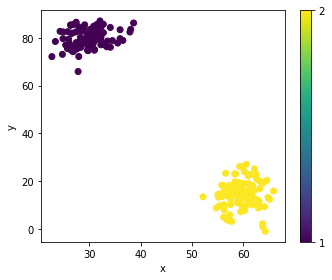

In [ ]:
#Plotting the dataset
# The indices of the features that we are plotting
x_index = 0
y_index = 1
labels = [0,1,2]

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: '{}'.format(labels[i]))

plt.figure(figsize=(5, 4))
plt.scatter(df['x'], df['y'], c=df['label'])
plt.colorbar(ticks=[0,1,2], format=formatter)
plt.xlabel('x')
plt.ylabel('y')

plt.tight_layout()
plt.show()

In [ ]:
#Split Dataset into Train and Test sets
train_batch = df.sample(n=100, random_state=1)
print(train_batch)
test_batch = df.drop(train_batch.index)
print(test_batch)


             x          y  label
58   24.737722  73.128577      1
40   30.834520  84.925399      1
34   29.083548  85.503379      1
102  60.980140  19.013622      2
184  57.764391   3.090673      2
..         ...        ...    ...
103  60.009171  15.457926      2
195  59.588045  16.439426      2
197  63.231014  16.905402      2
148  55.356873   9.617003      2
173  64.594511  20.309397      2

[100 rows x 3 columns]
             x          y  label
0    30.104577  76.327827      1
1    28.996929  78.128112      1
2    31.016839  75.141206      1
3    29.763839  74.668656      1
6    29.498749  79.601294      1
..         ...        ...    ...
182  57.351853   5.838122      2
188  56.237684  10.135910      2
190  60.071424  18.958601      2
192  57.061334   4.107983      2
196  57.388399  15.987969      2

[100 rows x 3 columns]


In [ ]:
#Train model
from sklearn import neighbors

#Split dataframe into data and target
features = train_batch[['x','y']]
target = train_batch['label']

#Training
knn = neighbors.KNeighborsClassifier(n_neighbors=10)
knn.fit(features, target)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [ ]:
test_data = test_batch.sample(n=1)
prediction = knn.predict(test_data[['x','y']])

print('Correct class is:{}'.format(test_data['label'].values) ,'And predicted values is:', prediction )

1

In [1]:
#Performance methods
def accuracy (test_data, model, positive_class):
  total_population = len(test_data)
  TP = 0
  TN = 0
  for i in range(total_population):
    test = test_data.sample()
    test_data.drop(test.index)
    feature = test[['x','y']]
    target = test.label.values[0]
    prediction = model.predict(feature)
    if prediction[0] == target:
      if target == positive_class:
        TP = TP+1
      else :
        TN = TN+1


  return (TP+TN)/total_population




def precision_mes (test_data, model, positive_class):
  total_population = len(test_data)
  TP = 0
  FP = 0
  for i in range(total_population):
    test = test_data.sample()
    test_data.drop(test.index)
    feature = test[['x','y']]
    target = test.label.values[0]
    prediction = model.predict(feature)
    if (prediction[0] == target) and (target == positive_class):
      TP = TP+1
    elif (prediction[0] == positive_class):
      FP = FP+1


  return (TP)/(FP+TP)

def recall (test_data, model, positive_class):
  total_population = len(test_data)
  TP = 0
  FN = 0
  for i in range(total_population):
    test = test_data.sample()
    test_data.drop(test.index)
    feature = test[['x','y']]
    target = test.label.values[0]
    prediction = model.predict(feature)
    if (prediction[0] == target) and (target == positive_class):
      TP = TP+1
    elif (target== positive_class):
      FN = FN+1


  return (TP)/(FN+TP)


def f_measure (test_data, model, positive_class):
  recall_measure = recall (test_data, model, positive_class)
  precision_measure = precision_mes(test_data, model, positive_class)
  return (2*precision_measure*recall_measure)/(precision_measure+recall_measure)


def evaluation (test_data, model, positive_class) :
  acc = accuracy(test_data, model, positive_class)
  prec = precision_mes(test_data, model, positive_class)
  fmes = f_measure (test_data, model, positive_class)

  return acc, prec, fmes

In [ ]:
#Model Evaluation
acc, precition, fmes = evaluation(test_batch, knn,1)
print('Accuracy:{}'.format(acc))
print('Precision:{}'.format(precition))
print('F-Measure:{}'.format(fmes))



Accuracy:1.0
Precision:1.0
F-Measure:1.0


### Todo en uno

A continuación se condensa el código previo para mayor agilidad en la visualización de variaciones.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: covariance is not positive-semidefinite.
  del sys.path[0]


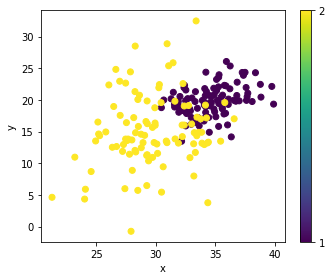

Accuracy:0.9
Precision:0.7586206896551724
F-Measure:0.9251254341952914


In [6]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import neighbors

#Data generation
means_A = [35,20]           ####
cov_A = [[1, 5],[5,3]]    ####
means_B = [30,15]           ####
cov_B = [[10, 1],[1,30]]    ####

x_A, y_A = np.random.multivariate_normal(means_A, cov_A, 100).T
x_B, y_B = np.random.multivariate_normal(means_B, cov_B, 100).T
XA = np.ndarray.tolist(x_A)
YA = np.ndarray.tolist(y_A)
XB = np.ndarray.tolist(x_B)
YB = np.ndarray.tolist(y_B)
XA.extend(XB)
YA.extend(YB)

#DataFrame generation
df = pd.DataFrame(XA, columns = ['x'])
df['y'] = YA

target = [1 for i in range(100)]
target.extend([2 for i in range(100)])

df['label']=target


#Plotting the dataset
# The indices of the features that we are plotting
x_index = 0
y_index = 1
labels = [0,1,2]

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: '{}'.format(labels[i]))

plt.figure(figsize=(5, 4))
plt.scatter(df['x'], df['y'], c=df['label'])
plt.colorbar(ticks=[0,1,2], format=formatter)
plt.xlabel('x')
plt.ylabel('y')

plt.tight_layout()
plt.show()

#Split Dataset into Train and Test sets
train_batch = df.sample(n=100, random_state=1)
test_batch = df.drop(train_batch.index)



#Train model
#Split dataframe into data and target
features = train_batch[['x','y']]
target = train_batch['label']

#Training
knn = neighbors.KNeighborsClassifier(n_neighbors=3)     #####
knn.fit(features, target)


#Model Evaluation
acc, precition, fmes = evaluation(test_batch, knn,1)
print('Accuracy:{}'.format(acc))
print('Precision:{}'.format(precition))
print('F-Measure:{}'.format(fmes))


Las conclusiones obtenidas son:

* Un mayor solapamiento a igual matriz de covarianza en las clases claramente deteriora la performance del método.
* Un número mayor de vecinos es beneficioso para clases superpuestas con puntos "dispersos",i.e, valores altos en la matriz de covarianza. Mientras que para clases "condensadas", i.e, con poca dispersión en el espacio de atributos, es beneficioso el uso de un número bajo de vecinos.